Ingresa una opcion: 
[1] Ver el analisis de los datos
[2] Jugar una partida vs la computadora
[3] Jugar una partida contra otro jugador

Cualquier otra opcion la tomaremos como salir

Opcion: 

 1



R E S U M E N
    Set                                                Casillas  Probabilidad de ganar(%)  Probabilidad de perder(%)
0    S1                  A1, B2, A3, B4, C3, D4, E5, F6, E7, D8                    3.3333                     0.0000
1    S2                                      A1, B2, C3, D4, C5                    0.0000                     3.3333
2    S3          A1, B2, C3, D4, E3, F2, G3, H4, G5, H6, G7, F8                    3.3333                     0.0000
3    S4                          A1, B2, C3, D4, E5, F6, G7, H8                   10.0000                     0.0000
4    S5  C1, B2, C3, B4, C3, D4, E3, D2, E3, F4, G5, H6, G7, H8                    3.3333                     0.0000
5    S6                      C1, D2, E3, F4, E3, F4, G5, H6, G7                    3.3333                     0.0000
6    S7                          C1, D2, E3, F4, E5, F6, E7, D8                    6.6667                     0.0000
7    S8                      C1, D2, E3, F4, G3, 

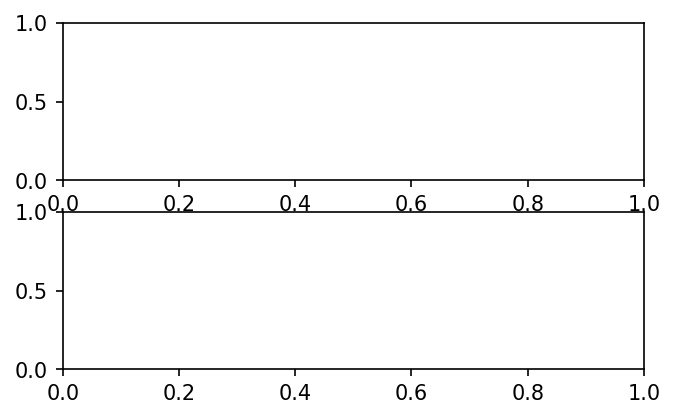

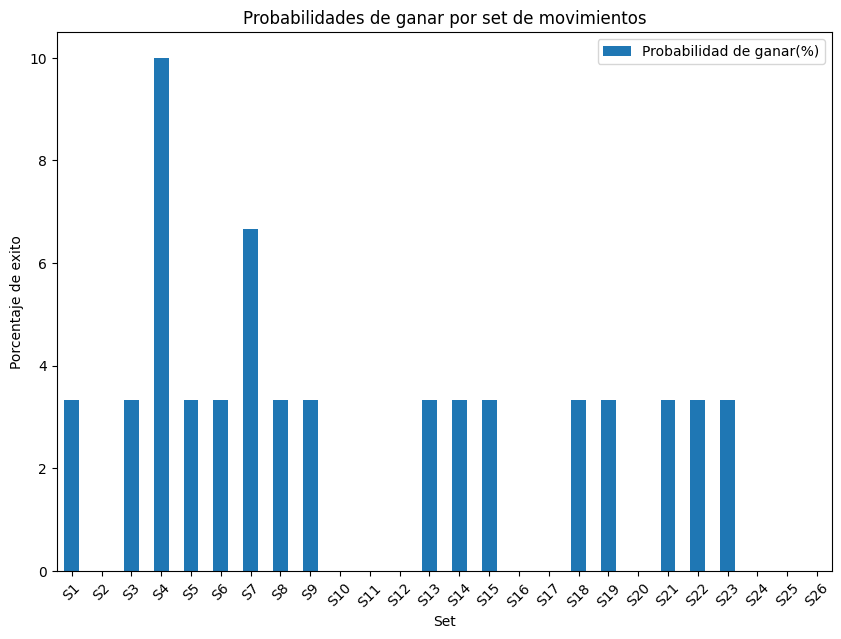

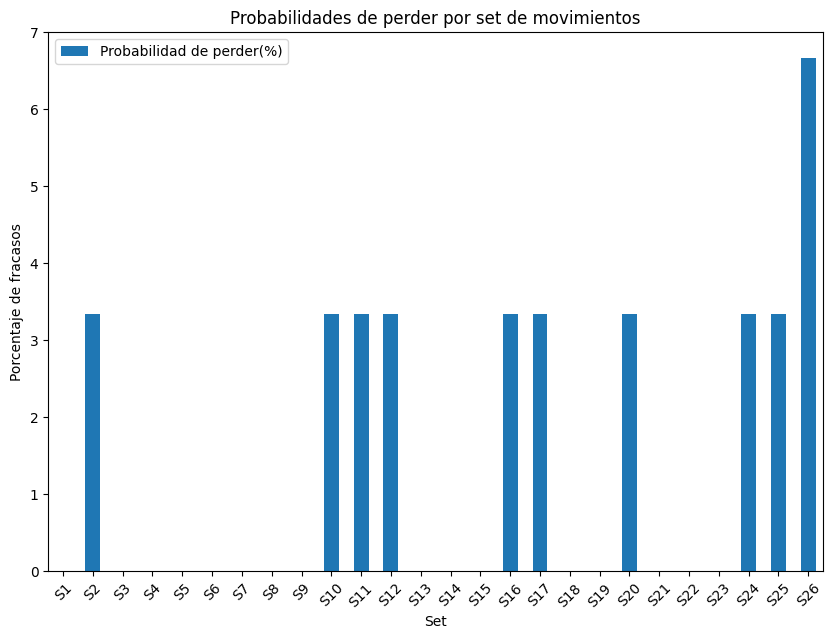


Todo bien :D


In [2]:
# <--!! Solo para dejarlo aclarado, hasta abajo dejé el main como tal, pero hasta arriba hay MUCHISIMOS métodos auxiliares que hice para no tener que estar Copiando y // pegando y copiando y pegando y copiando.... Se entiende vaya; intenté hacer el código lo más chiquito posible, y aún con eso, el codigo se terminó volviendo de 700 // lineas (del puro Main)  --!!>

from Fichas.Raton import Raton
from Fichas.GatoNOCPU import GatoNOCPU
from Fichas.GatoCPU import GatoCPU
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


def imprimirTablero():
	print('''
   _______________
8 |_|#|_|#|_|#|_|#|
7 |#|_|#|_|#|_|#|_|
6 |_|#|_|#|_|#|_|#|
5 |#|_|#|_|#|_|#|_|
4 |_|#|_|#|_|#|_|#|
3 |#|_|#|_|#|_|#|_|
2 |_|#|_|#|_|#|_|#|
1 |#|_|#|_|#|_|#|_|
   a b c d e f g h''')
	
	#/**
	#*
	#* Metodo auxiliar para crear y modificar un arreglo de Registros (este metodo está hecho mas de a fuerza que nada, por eso no se como describirlo,
	#* no pense ni siquiera que tendría que crearlo)
	#* @param registro El registro que vamos a agregar
	#*
	#*/
def nuevoRegistro(datos : list()):
	try:
		original = pd.read_csv("puntajes.csv", usecols = ["Casillas", "Turnos", "Resultado"])
		original.loc[len(original)] = datos
		original.reset_index().to_csv("puntajes.csv", header = True, index = False)
	except FileNotFoundError as nohay:
		try:
			agrega = {"Casillas" : [datos[0]], "Turnos" : [datos[1]], "Resultado" : [datos[2]]}
			primeros = pd.DataFrame(data = agrega)
			primeros.reset_index().to_csv("puntajes.csv", header = True, index = False)
		except Exception as e:
			print("error al cargar el registro, su partida se perdio :c");
	except:
		print("error error error!!!");
	finally:
		print("juego guardado exitosamente");


	#/**
	#* 
	#* Metodo auxiliar nomas para eliminar elementos de un arreglo
	#* @param arr El arreglo al que le vamos a quitar un elemento
	#* @param elem El elemento que queremos quitar del arreglo
	#* @return String[] 
	#* 
	#*/
def eliminarElemento(arr : list(), elem : str):
	arr.remove(elem)
	
	
	#/**
	#* 
	#* Metodo auxiliar nomas para llenar un arreglo
	#* @param arr1 El arreglo que vamos a llenar
	#* @param arr2 El arreglo del que vamos a jalar elementos
	#* 
	#*/
	
def copiarArreglo(arr1 : list(), arr2 : list()):
	for i in range(len(arr2)):
		arr1.append(arr2[i]);
	
	
	#/**
	#* 
	#* Metodo auxiliar para imprimir mensajes.
	#* @param num como trabaja con un arreglo, nomas que me diga que indice del arreglo que quiere imprimir, al fin que yo se que imprime cada indice.
	#* 
	#*/

def enviaMensaje(num : int):
	#// En este momento hay 5 mensajes.	
	mensajes = ["\n    No haremos nada por esta ocasion, puedes volver a correr el programa cuando gustes    \n", "!!!G A N A S T E!!!", "perdiste D:", "\nEs momento de decir adios!!! :\'c\n", "\n  hasta los mejores juegos tienen un limite para sus torneos (por supuesto mucho mas grande que mi limite, pero lo tienen). En este caso; este es el limite, introduce una menor cantidad de jugadores para poder iniciar un torneo  \n"];
	print(mensajes[num]);


# MAIN
veces = 0
chimalhuacan = []

print("Ingresa una opcion: \n[1] Ver el analisis de los datos\n[2] Jugar una partida vs la computadora\n[3] Jugar una partida contra otro jugador\n\nCualquier otra opcion la tomaremos como salir\n\nOpcion:", end = " ")
opsao = input()
if(opsao == '2'):
	nombre = input("Introduce tu nombre: ")
	chimalhuacan.append(nombre)
	
if(opsao == '3'):
	nombre1 = input("Introduce el nombre del jugador 1: ")
	chimalhuacan.append(nombre1)
	nombre2 = input("Introduce el nombre del jugador 2: ")
	chimalhuacan.append(nombre2)

if(opsao != '1' and opsao != '2' and opsao != '3'):
	chimalhuacan.append(" ")
	chimalhuacan.append(" ")
	chimalhuacan.append(" ")
  
#		// ## Esto es cuando de plano no metieron lo que deberian de meter 
if(len(chimalhuacan) == 3):
	enviaMensaje(0)
		
elif(len(chimalhuacan) == 0):  #// AQUI VOY A HACER EL ANALISIS DE DATOS		
	try:
		i = 0
		probaG = []
		probaP = []
		movs = []
		original = pd.read_csv("puntajes.csv", usecols = ["Casillas", "Turnos", "Resultado"])
		agrupados = original.groupby("Casillas")
		resultados = agrupados["Resultado"]
		for nombres, series in resultados:
			ganados = 0
			perdidos = 0
			arr = []
			for valor in series:
				if(valor == "GANADOR"):
					ganados += 1
				if(valor == "PERDEDOR"):
					perdidos += 1
			probaG.append(round((ganados/len(original))*100, 4))
			probaP.append(round(perdidos/len(original)*100, 4))
			movs.append(nombres)
		setsitos = ["S" + str(i + 1) for i in range(len(movs))]
		mostrar = pd.DataFrame({"Set":setsitos, "Casillas":movs, "Probabilidad de ganar(%)":probaG, "Probabilidad de perder(%)":probaP})
		print("\nR E S U M E N")
		print(mostrar.to_string())
		print(" ")
		fig, axes = plt.subplots(2, 1, figsize = (5, 3), dpi = 150)
		axes[0] = mostrar.plot.bar(x = "Set", y = "Probabilidad de ganar(%)", rot = 45, figsize = (10, 7))
		axes[0].set_ylabel("Porcentaje de exito")
		axes[0].set_title("Probabilidades de ganar por set de movimientos")
		axes[1] = mostrar.plot.bar(x = "Set", y = "Probabilidad de perder(%)", rot = 45, figsize = (10, 7))
		axes[1].set_ylabel("Porcentaje de fracasos")
		axes[1].set_title("Probabilidades de perder por set de movimientos")
		#fig.
		fig.add_axes = axes[0]
		fig.add_axes = axes[1]
		plt.show()
		print("")
		
	except FileNotFoundError: 
		print("No hay ningun registro guardado")
		
		
elif(len(chimalhuacan) == 1):   #// Juega contra la computadora
	try:
		#// ## El primer for (y el primer try)		
		#// ## Aqui es donde como tal manda al jugador cada vez que empieza el juego por primera vez o cada vez que dice que quiere volver a jugar contra la computadora.
		while(True):
			#// ## Por supuesto, primero la bienvenida y explicar las reglas del juego
					
			print("\"" + chimalhuacan[0] + "\" jugar\u00e1 contra la computadora")
			print("\nAy diosito santo que espanto, que miedo jugar contra la computadora")
			print("Pero bueno, vamos a empezar lo mero bueno\n")
			print("Por omision, siempre vas a ser el ratonsito, si quieres ser el gato, te va a tocar hacer un juego de dos (!!!aunque seas tu solito pues, que tiene!!!)\n")
					
			print("Como aqu\u00ed no somos dictadores, te voy a dar chance de que tu me digas en que posicion quieres iniciar; nomas te voy a pedir algo; ELIGE SIEMPRE LAS CASILLAS DE COLOR NEGRO Y NO SE VALEN LAS CASILLAS QUE NO ESTEN EN EL RENGLON UNO, EN LA MERA ESQUINA CONTRARIA DEL LADO DE LOS GATOS; por ejemplo, si quieres que iniciar en una de las esquinas, escribe \"H1\" para la esquina inferior izquierda (una casilla negra); escribe \"F1\" PERO NO PRESIONES LA TECLA F1, escribe \"F1\" para una casilla negra en el primer renglon del tablero o como \u00faltimo ejemplo; escribe \"B1\" para la casilla negra al lado de la esquina inferior derecha. En caso de que todavia no quede claro, para indicar la posicion de tu pieza, debes escribir primero una letra de la A a la H y acto seguido escribir el \"1\"; Y ASEGURATE DE QUE LA CASILLA SEA NEGRA: \n")
			h = input("Casilla con una letra y luego el n\u00famero \"1\": ")
			
			print("")
			
			#// ## Revisamos que el usuario ingrese una entrada valida
			#// ## Hasta que no ingrese la entrada valida, no lo voy a dejar continuar
			while(len(h) != 2 or (h[0].upper() not in "ACEG") or  int(h[1]) != 1):
				if(len(h) == 2 and (h[0].upper() in "ACEG") and int(h[1]) == 1):
					break
				
				print("\n?qu\u00e9 te acabo de decir?, lo siento, pero esa entrada es incorrecta (o escribiste mas de dos letras, o menos de dos letras, o no introdujiste una letra entre la A y la H, o pusiste un n\u00famero distinto del uno o de plano LA CASILLA NO ES NEGRA QUE SEGURO FUE TU ERROR POR NECIO), introduce la posicion en el formato y con la longitud requerida: es decir, primero una letra de la A a la H y un numero del 1 al 8 Y QUE ADEMAS SEA UNA CASILLA NEGRA (Ejemplos: A1, C1, E1 o G1) DE AQU\u00cd NO VAS A SALIR HASTA QUE PONGAS LA ENTRADA CORRECTA: \n")
				h = input("Casilla con una letra y luego el n\u00famero \"1\": ")
			
			
			mish = Raton(h)
			kot4 = "B8"
			kot3 = "D8"
			kot2 = "F8"
			kot1 = "H8"
			koshka1 = GatoCPU(kot1)
			koshka2 = GatoCPU(kot2)
			koshka3 = GatoCPU(kot3)
			koshka4 = GatoCPU(kot4)
			gatos = [koshka1, koshka2, koshka3, koshka4]
			jugadas = 0    #// Esta particularmente de aqui va a ser para medir en cuantos movimientos gana o pierde el jugador.
			casillas = h + ", "
					
			#// ## esta primera llamada la hago porque si aparece una excepcion, deberia de aparecer aqui mismo, sino, ya es CASI cien por ciento seguro que el programa va a funcionar.
			mish.posiblesMovimientos()			
					
			#// ## Empieza el juego, aqui es donde va a estar metido todo el tiempo 
			while( True ):	
				imprimirTablero()
				#// ## Primero programamos los movimientos del usuario que son más faciles, es leer entradas 
						
				#// ## Primero veamos los movimientos con los que de verdad EN SERIO solo cuenta el ratoncito
				posibles = []
						
				
				#// ## conviene mas hacer una copia de los posibles movimientos totales, para no estar haciendo la llamada al metodo
				#// ## primero el arreglo que vamos a llenar, luego el arreglo del que vamos a copiar
						
				copiarArreglo(posibles, mish.posiblesMovimientos())	
						
				#// ## Y ahora si, vamos a buscar las casillas a las que el ratoncito se puede mover realmente
				mish.casillasRaton(posibles, gatos)
						
				#// ## si ya de plano no puede moverse (o se lo comió un gato), ya ni le muevas, ya perdiste.
				if(len(mish.casillasRaton(posibles, gatos)) == 0 or (len(mish.casillasRaton(posibles, gatos)) == 1 and mish.casillasRaton(posibles, gatos)[0][1] == '0') or (len(mish.casillasRaton(posibles, gatos)) == 2 and mish.casillasRaton(posibles, gatos)[0][1] == '0' and mish.casillasRaton(posibles, gatos)[1][1] == '0') or (mish.obtenerPosicion()[0].upper() == koshka1.obtenerPosicion()[0] and mish.obtenerPosicion()[1] == koshka1.obtenerPosicion()[1]) or (mish.obtenerPosicion()[0].upper() == koshka2.obtenerPosicion()[0] and mish.obtenerPosicion()[1] == koshka2.obtenerPosicion()[1]) or (mish.obtenerPosicion()[0].upper()[0] == koshka3.obtenerPosicion()[0] and mish.obtenerPosicion()[1] == koshka3.obtenerPosicion()[1]) or (mish.obtenerPosicion()[0].upper()[0] == koshka4.obtenerPosicion()[0] and mish.obtenerPosicion()[1] == koshka4.obtenerPosicion()[1])):
					enviaMensaje(2)
					print("movimientos totales del jugador: " + str(jugadas))
					reg = [casillas[:-2], jugadas, "PERDEDOR"]
					try:
						nuevoRegistro(reg)
					except FileNotFoundError as nohay:
						print("Entre al except del Main Perdedor")
						try:
							agrega = {"Casillas" : [datos[0]], "Turnos" : [datos[1]], "Resultado" : [datos[2]]}
							primeros = pd.DataFrame(data = agrega)
							original.reset_index().to_csv("puntajes.csv", header = True, index = False, mode = 'x')
						except Exception as e:
							print("error al cargar el registro, su partida se perdio :c")
					finally:
						print("juego guardado exitosamente (a menos que antes se indicara lo contrario)")
					
					break 
						
				#// ## ya sabemos cuales son exactamente las casillas a las que se puede mover el ratoncito, avisale al usuario
				print("\nEl ratoncito se puede mover a alguna de las siguientes casillas: \n")
				for i in range(len(mish.casillasRaton(posibles, gatos))):
					if(i == len(mish.casillasRaton(posibles, gatos)) - 1):
						print("  " + mish.casillasRaton(posibles, gatos)[i])
					else:
						print("  " + mish.casillasRaton(posibles, gatos)[i] + ",", end = " ")
						
						
				print("\n?A que casilla te vas a mover? (escribe explicitamente la coordenada, por ejemplo, una de las opciones es la casilla \"C2\", escribe \"C2\" y el ratoncito se mover\u00e1 a la casilla \"C2\"): \n")
				print()
				ayu = input("opcion (La casilla copiada EXACTAMENTE COMO APARECE): ")
				ayu.replace(" ", "")
				vale = 0
						
				#// ## vamos a revisar que precisamente la entrada del usuario sea valida, para eso creamos un entero auxiliar.
				#// ## teoricamente SOLO UNO DEBERIA COINCIDIR
						
				for i in range(len(posibles)):
					if(posibles[i].lower() == (ayu.lower())):
						auxil = [ayu[0], ayu[1]]
						mish.asignarPosicion(auxil)
						vale = vale + 1
						
				#// ## si de plano no ingreso nada valido, y el entero auxiliar no se movio.
				if(vale == 0):
					#// ## Como se que los usuarios son NECIOS metamoslo en un bucle hasta que se canse o hasta que acate
					while(vale == 0):
						print("bien dijo don ramon: \"Esta bien no ser muy inteligente, pero cu\u00e1l es la necesidad de romper records?\", esa entrada es INCORRECTA, pon la entrada correcta (y hasta que no pongas una de las " + str(len(posibles)) + " opciones disponibles, no voy a dejarte salir de aqu\u00ed)")
						#// ## Le recordamos al usuario los movimientos posibles por si se le olvidaron
						print("\nEl ratoncito se puede mover a alguna de las siguientes casillas: \n")
						for i in range(len(mish.casillasRaton(posibles, gatos))):
							if(i == len(mish.casillasRaton(posibles, gatos)) - 1):
								print("  " + mish.casillasRaton(posibles, gatos)[i])
							else:
								print("  " + mish.casillasRaton(posibles, gatos)[i] + ",", end = " ")
								
						print("\n?A que casilla te vas a mover? (Y AHORA SI ESCRIBELA BIEN)\n")
						ayu = input("opcion (La casilla copiada EXACTAMENTE COMO APARECE): ")
						ayu.replace(" ", "")
								
						#// ## Revisamos que el usuario ahora si haya escrito bien la casilla a la que se quiere mover.
						for i in range(len(posibles)):
							if(posibles[i].lower() == (ayu.lower())):
								auxil = [ayu[0], ayu[1]]
								mish.asignarPosicion(auxil)
								vale = vale + 1
						#// ## Si todo sale bien, teoricamente aqui deberia de sacar al usuario, sino, vuelve a regañarlo
						#// ## y aplicale king crimson hasta que el wey acate o tenga golden experience requiem 
					
				casillas += (mish.obtenerPosicion()) + ", "
				print("casillas movidas: " + casillas + "\n")		
				#//## Ya finalmente, veamos que el ratoncito ya con ese movimiento ganará
						
				if(mish.obtenerPosicion()[1] == '8'):  #// Ya ganaste, ya que los gatos ni le muevan
					enviaMensaje(1)
					print("movimientos totales del jugador: " + str(jugadas))
					reg = [casillas[:-2], jugadas, "GANADOR"]
					try:
						nuevoRegistro(reg)
					except FileNotFoundError as nohay:
						print("Entre a la excepcion del main Ganador de la seccion del raton")
						try:
							agrega = {"Casillas" : [datos[0]], "Turnos" : [datos[1]], "Resultado" : [datos[2]]}
							primeros = pd.DataFrame(data = agrega)
							original.reset_index().to_csv("puntajes.csv", header = True, index = False, mode = 'x')
						except Exception as e:
							print("error al cargar el registro, su partida se perdio :c")
					finally:
						print("juego guardado exitosamente (a menos que antes se indicara lo contrario)")

					break 
						
				
						
				#// ## se supone que ya quedo el usuario, ahi mas al rato veo que mas le falta
						
						
					
						
						
						
						
				#// ## Ahora vamos a hacer los movimientos de la computadora, un poco más dificil, porque aquí toca usar random, y hay que verificar que los gatos no se crucen, y así
						
						
				#// ## Vamos a mover a los gatos por orden, primero el koshka1 luego el koshka2 y así y así.
				#// ## Como siempre, primero vemos los movimientos que en verdad en verdad puede hacer el gato
						
				posibles2 = []
				copiarArreglo(posibles2, koshka1.posiblesMovimientos())
						
						
						
				#// ## Y ahora si, vamos a buscar las casillas a las que el primer gato se puede mover realmente
				#// ## el cero es porque estamos viendo al primer gato, pero ya todos sabemos que en los procesos iterativos, 
				#// ## el primer gatillo terminaría siendo el indice cero, y este indice lo vamos a usar para hacer comparaciones
				#// ## posibles2 se va a hacer mas chiquito o se va a quedar igual, dependiendo de que suceda con "gatos", si resulte
				#// ## que un gato le esta estorbando al que le toca moverse.
				#// ## 
						
				koshka1.casillasGatos(posibles2, gatos, 0)
						
						
				#// ## Ahora si ya sabemos exactamente a que casillas se puede mover el gato
						
						
						
				#// ## vamos a usar un switch, de hecho 2 switches. El primero es para ver cuantos movimientos tiene el gato, y el segundo anidado para ver si se mueve para la diagonal derecha o pa la diagonal izquierda.
						
				if(koshka1.obtenerPosicion()[1] != '1'):
					koshka1.moverGato(koshka1.casillasGatos(posibles2, gatos, 0))
				
						
				#// ## ya es solamente copiar y pegar para los otros 4 gatos.
						
				posibles3 = []
				copiarArreglo(posibles3, koshka2.posiblesMovimientos())
				if(koshka2.obtenerPosicion()[1] != '1'):
					koshka2.moverGato(koshka2.casillasGatos(posibles3, gatos, 1));
				
				posibles4 = []
				copiarArreglo(posibles4, koshka3.posiblesMovimientos())
						
				if(koshka3.obtenerPosicion()[1] != '1'):
					koshka3.moverGato(koshka3.casillasGatos(posibles4, gatos, 2))
						
						
				posibles5 = []
				copiarArreglo(posibles5, koshka4.posiblesMovimientos())
						
				if(koshka4.obtenerPosicion()[1] != '1'):
					koshka4.moverGato(koshka4.casillasGatos(posibles5, gatos, 3))
						
				#// ## Si ya todos los gatos llegan a la otra esquina, que ya ni le muevan, ya perdieron
				if(koshka4.obtenerPosicion()[1] == '1' and koshka3.obtenerPosicion()[1] == '1' and koshka2.obtenerPosicion()[1] == '1' and koshka1.obtenerPosicion()[1] == '1'):
					enviaMensaje(1)
					print("movimientos totales del jugador: " + str(jugadas))
					reg = [casillas[:-2], jugadas, "GANADOR"]
					try:
						nuevoRegistro(reg)
					except FileNotFoundError as nohay:
						print("Entre al excep del Main GANADOR de la seccion de los Gatos")
						try:
							agrega = {"Casillas" : [datos[0]], "Turnos" : [datos[1]], "Resultado" : [datos[2]]}
							primeros = pd.DataFrame(data = agrega)
							original.reset_index().to_csv("puntajes.csv", header = True, index = False, mode = 'x')
						except Exception as e:
							print("error al cargar el registro, su partida se perdio :c")
					finally:
						print("juego guardado exitosamente (a menos que antes se indicara lo contrario)")
					break 
						
				#// ## ya con eso ya tenemos los movimientos de la computadora y del usuario 
						
						
				#// ## Ya nomas nos queda avisarle al usuario donde anda el y donde están los gatos para que tome sus precauciones
						
				print("\nEl rat\u00f3n actualmente est\u00e1 en la casilla: " + mish.obtenerPosicion()[0] + mish.obtenerPosicion()[1])
				for k in range(len(gatos)):
					print("El gato " + str((k + 1)) + " actualmente est\u00e1 en la casilla: " + gatos[k].obtenerPosicion()[0] + gatos[k].obtenerPosicion()[1])
				print("\n")
				jugadas += 1
						
				#// Aqui nisiquiera considero empates, porque por el modo en que se mueve la computadora es imposible que haya uno.
					
			#// ## Nos saca del for del juego, de la partida, ya sea porque perdio el ratoncito o porque ganó el ratoncito, pero 
			#// ## por algún motivo tuvo que salirse
					
		#	// ## Momento de preguntarle si quiere volver a jugar contra la computadora o ya nos vamos a dormir. 
			print("\n?Quieres jugar otra partida contra la computadora? \n [1] Si \n [2] No\n")
			ayu3 = input("opcion: ")
			op3 = ayu3[0]
			if(op3 != '1' or op3 != '2'):
				while(op3 != '1' or op3 != '2'):
					if(op3 == '1'):
						break
					if(op3 == '2'):
						break
					print("ELIGE 1 O 2, ?Que es eso de poner: " + ayu3 + " ?")
					print("\n[1] SI\n[2] NO\n")
					ayu3 = input("opcion: ")
					op3 = ayu3[0]
			if(op3 == '2'): #// se acaba el programa
				break
			print("\n") #// sino, volvemos a empezar
	#// Se acaba el Try, si todo salio bien, tecnicamente no nos tuvo que mandar ninguna excepcion, si algo falló, el juego se acabó.
	except ValueError as nonum:
		print("\nNo puedo hacer nada si en la segunda posicion tengo una letra (como es tu caso en que tenemos una letra en vez de un numero al final), es claro que una letra es distinta de un numero, asi no se puede, por favor, para la proxima introduce un numero en vez de una letra para poder darte los movimientos posibles de tus fichas de ajedrez (Por ejemplo, escribe A8, B7, C6, H5, G4, etc), es para respetar la nomenclatura del Ajedrez. \nReinicia el programa y vuelve a introducir tus coordenadas");
	finally:
		enviaMensaje(3);

		
					
			#/***AHI TE LO ENCARGO JAVIER DEL DOMINGO 19 DE MAYO.***/
			#/***Ya llegó el Javier del domigno 19 de Mayo, ahora desapareceras ahhh!!!***/
						
		
elif(len(chimalhuacan) == 2): #// Toca jugar PVP usuario contra usuario, carnal contra carnal, aqui se rompen amistades mi gente!!!
	try:
		while( True ):
			cat = " "
			maus = " "
			print("\"" + chimalhuacan[0] + "\" jugar\u00e1 contra \"" + chimalhuacan[1] + "\"")
			print("\nPara que veas que no soy mala onda, bueno un poco si, los voy a dejar escoger su rol; el que va a decidir sera: \"" + chimalhuacan[1] + "\"")
			print("?Qui\u00e9res jugar con los Gatos o con el rat\u00f3n? \n [1] Gatos \n [2] Rat\u00f3n\n")
					
			#// $$ Vamos a leer las entradas del carnal, a ver si hace todo bien
			ayu4 = input("opci\u00f3n: ")
			op4 = ayu4[0]
					
			#// $$ Si la opcion es incorrecta
			if(op4 != '1' or op4 != '2'):
				#// $$ metelo a un ciclo hasta que ponga lo correcto por favor!!! (o hasta que mate el programa, tambien jala)
				while(op4 != '1' or op4 != '2'):
					if(op4 == '1'): 
						break
					if(op4 == '2'): 
						break
					print("ELIGE \'1\' O \'2\', ?Qu\u00e9 es eso de poner: " + ayu4 + " ?")
					print("\n[1] GATO\n[2] RAT\u00d3N\n")
					ayu4 = input("opcion: ")
					op4 = ayu4[0]
				
			
					
					
			if(op4 == '1'):
				#// $$ El usuario 1 es el raton, el usuario 2 es el gato
				cat = chimalhuacan[1]
				maus = chimalhuacan[0]
			else:
				#// $$ El usuario 2 es el raton, el usuario 1 es el gato
				cat = chimalhuacan[0]
				maus = chimalhuacan[1]
					
			print("\nOra si, !!!VAMOS A EMPEZAR!!!, le toca a \"" + maus + "\", ser el primero en mover; primero lo primero, elige d\u00f3nde quieres empezar. \nNom\u00e1s te voy a pedir algo; ELIGE SIEMPRE LAS CASILLAS DE COLOR NEGRO, Y NO SE VALEN LAS CASILLAS QUE NO ESTEN EN EL RENGL\u00d3N UNO, EN LA MERA ESQUINA CONTRARIA DEL LADO DE LOS GATOS; por ejemplo, si quieres que iniciar en una de las esquinas, escribe \"G1\" para la esquina inferior izquierda (una casilla negra); escribe \"C1\" PERO NO PRESIONES LA TECLA F1, escribe \"C1\" para una casilla negra en el primer renglon del tablero o como \u00faltimo ejemplo; escribe \"A1\" para la casilla negra al lado de la esquina inferior derecha. En caso de que todavia no quede claro, para indicar la posicion de tu pieza, debes escribir primero una letra de la A a la H y acto seguido escribir el \"1\"; Y ASEGURATE DE QUE LA CASILLA SEA NEGRA: ")
					
			print("\nCasilla con una letra y luego el n\u00famero \"1\": ", end = " ")
			h = input()
					
					
			#// $$ Revisamos que el usuario haya ingresado una entrada valida
					
						
			#// $$ Hasta que no ingrese la entrada valida, no lo voy a dejar continuar
			while(len(h) != 2 or (h[0].upper() not in "ACEG") or  int(h[1]) != 1):
				if(len(h) == 2 and (h[0].upper() in "ACEG") and  int(h[1]) == 1):
						break
				print("\n?qu\u00e9 te acabo de decir " + maus + "?" + ", lo siento, pero esa entrada es incorrecta (o escribiste mas de dos letras, o menos de dos letras, o no introdujiste una letra entre la A y la H, o pusiste un n\u00famero distinto del uno o de plano LA CASILLA NO ES NEGRA QUE SEGURO FUE TU ERROR POR NECIO), introduce la posicion en el formato y con la longitud requerida: es decir, primero una letra de la A a la H y un n\u00famero del 1 al 8 Y QUE ADEMAS SEA UNA CASILLA NEGRA (Ejemplos: A1, C1, E1 o G1) DE AQU\u00cd NO VAS A SALIR HASTA QUE PONGAS LA ENTRADA CORRECTA: ");
				print("\nCasilla con una letra y luego el n\u00famero \"1\": ", end = " ")
				h = input()
				
				
			
			#// $$ Creamos lo que necesitamos para el juego.
			mish = Raton(h);
			kot4 = "B8"
			kot3 = "D8"
			kot2 = "F8"
			kot1 = "H8"
			koshka1 = GatoNOCPU(kot1)
			koshka2 = GatoNOCPU(kot2)
			koshka3 = GatoNOCPU(kot3)
			koshka4 = GatoNOCPU(kot4)
			gatos = [koshka1, koshka2, koshka3, koshka4]
			jugadas = 0;    #// Esta particularmente de aqui va a ser para medir en cuantos turnos se acaba el juego.
			casillas = h + ", "
					
			#// $$ esta primera llamada la hago porque si aparece una excepcion, deberia de aparecer aqui mismo, sino, ya es cien por ciento seguro que el programa va a funcionar.

			mish.posiblesMovimientos()
					
			#// $$ Ahora si, EMPIEZA EL JUEGO
					
			while( True ):
				imprimirTablero()
				#// $$ Primero programamos los movimientos del raton
				#// $$ Primero veamos los movimientos con los que de verdad EN SERIO solo cuenta el ratoncito
				posibles = []
						
				#// $$ conviene mas hacer una copia de los posibles movimientos totales, para no estar haciendo la llamada al metodo
				#// $$ primero el arreglo que vamos a llenar, luego el arreglo del que vamos a copiar	
				copiarArreglo(posibles, mish.posiblesMovimientos())
						
				#// $$ Y ahora si, vamos a buscar las casillas a las que el ratoncito se puede mover realmente
				#// $$ si ya de plano no puede moverse, ya ni le muevas, ya perdiste.
				if(len(mish.casillasRaton(posibles, gatos)) == 0 or (len(mish.casillasRaton(posibles, gatos)) == 1 and mish.casillasRaton(posibles, gatos)[0][1] == '0') or (len(mish.casillasRaton(posibles, gatos)) == 2 and mish.casillasRaton(posibles, gatos)[0][1] == '0' and mish.casillasRaton(posibles, gatos)[1][1] == '0') or (mish.obtenerPosicion()[0].upper()[0] == koshka1.obtenerPosicion()[0] and mish.obtenerPosicion()[1] == koshka1.obtenerPosicion()[1]) or (mish.obtenerPosicion()[0].upper()[0] == koshka2.obtenerPosicion()[0] and mish.obtenerPosicion()[1] == koshka2.obtenerPosicion()[1]) or (mish.obtenerPosicion()[0].upper()[0] == koshka3.obtenerPosicion()[0] and mish.obtenerPosicion()[1] == koshka3.obtenerPosicion()[1]) or (mish.obtenerPosicion()[0].upper()[0] == koshka4.obtenerPosicion()[0] and mish.obtenerPosicion()[1] == koshka4.obtenerPosicion()[1])):
					print(maus + " ", end = "")
					enviaMensaje(2)
					print("\n" + cat + " ", end = "")
					enviaMensaje(1)
					print("\nN\u00famero total de turnos que se jugaron (los turnos se miden una vez que se movieron todos los gatos y el raton, se aumentan en uno ya que el jugador 1 hizo su movimiento y el jugador 2 hizo todos sus movimientos, espero se entienda como se miden los turnos que se jugaron): " + str(jugadas));
					reg = [casillas[:-2], jugadas, "PERDEDOR"]
					try:
						nuevoRegistro(reg)
					except FileNotFoundError as nohay:
						print("Entre al except del Main Perdedor")
						try:
							agrega = {"Casillas" : [datos[0]], "Turnos" : [datos[1]], "Resultado" : [datos[2]]}
							primeros = pd.DataFrame(data = agrega)
							original.reset_index().to_csv("puntajes.csv", header = True, index = False, mode = 'x')
						except Exception as e:
							print("error al cargar el registro, su partida se perdio :c")
					finally:
						print("juego guardado exitosamente (a menos que antes se indicara lo contrario)")
					
					break 
						
						
						
				#// $$ ya sabemos cuales son exactamente las casillas a las que se puede mover el ratoncito, avisale al usuario
						
				print("\nEl ratoncito se puede mover a alguna de las siguientes casillas: \n");
				for i in range(len(mish.casillasRaton(posibles, gatos))):
					if(i == len(mish.casillasRaton(posibles, gatos)) - 1):
						print("  " + mish.casillasRaton(posibles, gatos)[i])
					else:
						print("  " + mish.casillasRaton(posibles, gatos)[i] + ",", end = "")
						
						
				print("\n?A que casilla te vas a mover? (escribe explicitamente la coordenada, por ejemplo, una de las opciones es la casilla \"C2\", escribe \"C2\" y el ratoncito se mover\u00e1 a la casilla \"C2\"): \n")
				print("opci\u00f3n (La casilla copiada EXACTAMENTE COMO APARECE): ", end = "")
				ayu = input()
				ayu.replace(" ", "")
				vale = 0
						
				#// $$ vamos a revisar que precisamente la entrada del usuario sea valida, para eso creamos un entero auxiliar.
				#// $$ teoricamente SOLO UNO DEBERIA COINCIDIR
						
				for i in range(len(posibles)):
					if(posibles[i].lower() == ayu.lower()):
						auxil = [ayu[0], ayu[1]]
						mish.asignarPosicion(auxil)
						vale = vale + 1
						
				#// $$ si de plano no ingreso nada valido, y el entero auxiliar no se movio.
				if(vale == 0):
					#// $$ Como se que los usuarios son NECIOS metamoslo en un bucle hasta que se canse o hasta que acate
					while(vale == 0):
						print("\n" + maus + "... Bien dijo don ramon: \"Esta bien no ser muy inteligente, pero cu\u00e1l es la necesidad de romper records?\", esa entrada es INCORRECTA, pon la entrada correcta (y hasta que no pongas una de las " + str(len(posibles)) + " opciones disponibles, no voy a dejarte salir de aqu\u00ed)")
						#// $$ Le recordamos al usuario los movimientos posibles por si se le olvidaron
						print("\nEl ratoncito se puede mover a alguna de las siguientes casillas: \n")
						for i in range(len(mish.casillasRaton(posibles, gatos))):
							if(i == len(mish.casillasRaton(posibles, gatos)) - 1):
								print("  " + mish.casillasRaton(posibles, gatos)[i])
							else:
								print("  " + mish.casillasRaton(posibles, gatos)[i] + ",", end = "")
						print("\n?A que casilla te vas a mover? (Y AHORA SI ESCRIBELA BIEN)\n")
						print("opci\u00f3n (La casilla copiada EXACTAMENTE COMO APARECE): ", end = "")
						ayu = input()
						ayu.replace(" ", "")
								
						#// $$ Revisamos que el usuario ahora si haya escrito bien la casilla a la que se quiere mover.
						for i in range(len(posibles)):
							if(posibles[i].lower()==ayu.lower()):
								auxil = [ayu[0], ayu[1]]
								mish.asignarPosicion(auxil)
								vale = vale + 1

						#// $$ Si todo sale bien, teoricamente aqui deberia de sacar al usuario, sino, vuelve a regañarlo
						#// $$ y aplicale king crimson hasta que el wey acate o tenga golden experience requiem 
						
				#//$$ Ya finalmente, veamos si el ratoncito ya con ese movimiento ganará
				casillas += mish.obtenerPosicion() + ", "
				if(mish.obtenerPosicion()[1] == '8'):  #// Ya ganaste, ya que los gatos ni le muevan
					print(maus + "... ", end = "")
					enviaMensaje(1)
					print(cat + ", ", end = "")
					enviaMensaje(2)
					print("\nN\u00famero total de turnos que se jugaron (los turnos se miden una vez que se movieron todos los gatos y el raton, se aumentan en uno ya que el jugador 1 hizo su movimiento y el jugador 2 hizo todos sus movimientos, espero se entienca como se miden los turnos que se jugaron): " + str(jugadas))
					reg = [casillas[:-2], jugadas, "GANADOR"]
					try:
						nuevoRegistro(reg)
					except FileNotFoundError as nohay:
						print("Entre a la excepcion del main Ganador de la seccion del raton")
						try:
							agrega = {"Casillas" : [datos[0]], "Turnos" : [datos[1]], "Resultado" : [datos[2]]}
							primeros = pd.DataFrame(data = agrega)
							original.reset_index().to_csv("puntajes.csv", header = True, index = False, mode = 'x')
						except Exception as e:
							print("error al cargar el registro, su partida se perdio :c")
					finally:
						print("juego guardado exitosamente (a menos que antes se indicara lo contrario)")

					break 
						
				#// $$ Ya quedaron los movimientos del Raton, ahora nos encargamos de los movimientos del Gato
				#// $$ vamos a hacerlo como en el else if anterior, solo que aqui va a aplicarse un polimorfismo, porque con 
				#// $$ la computadora era facil, nomas le deciamos que lo mande a un lado o al otro, pero aqui debe haber
				#// $$ libertad de que el usuario decida a donde quiere moverse. 
						
				print("\nMuy bien!!!, ahora " + cat + ", es tu turno. A ti te toca hacer 4 movimientos para tus cuatro gatos, vamos a hacerlo poco a poquito.")
				print("\nEste es el gato 1\n")
				posibles2 = []
				copiarArreglo(posibles2, koshka1.posiblesMovimientos());
						
				if(koshka1.posicion[1] != '1' and len(koshka1.casillasGatos(posibles2, gatos, 0)) != 0):
					koshka1.moverGato(koshka1.casillasGatos(posibles2, gatos, 0))
				else:
					print("El Primer gato no puede moverse.")
						
				#// $$ Hacemos los movimientos analogos para los 3 gatos restantes.
						
				print("\nEste es el gato 2\n")
				posibles3 = []
				copiarArreglo(posibles3, koshka2.posiblesMovimientos());
						
				if(koshka2.posicion[1] != '1' and len(koshka2.casillasGatos(posibles3, gatos, 1)) != 0):
					koshka2.moverGato(koshka2.casillasGatos(posibles3, gatos, 1))
				else:
					print("El Segundo gato no puede moverse.")
				
				print("\nEste es el gato 3\n")
				posibles4 = []
				copiarArreglo(posibles4, koshka3.posiblesMovimientos());
						
				if(koshka3.posicion[1] != '1' and len(koshka3.casillasGatos(posibles4, gatos, 2)) != 0):
					koshka3.moverGato(koshka3.casillasGatos(posibles4, gatos, 2))
				else:
					print("El Tercer gato no puede moverse.")
								
				print("\nEste es el gato 4\n")
				posibles5 = []
				copiarArreglo(posibles5, koshka4.posiblesMovimientos())
						
				if(koshka4.posicion[1] != '1' and len(koshka4.casillasGatos(posibles5, gatos, 3)) != 0):
					koshka4.moverGato(koshka4.casillasGatos(posibles5, gatos, 3))
				else:
					print("El Cuarto gato no puede moverse.")
						
				#// $$ Si ya todos los gatos llegan a la otra esquina, que ya ni le muevan, ya perdieron
				if(koshka4.posicion[1] == '1' and koshka3.posicion[1] == '1' and koshka2.posicion[1] == '1' and koshka1.posicion[1] == '1'):
					print(maus + "... ", end = " ");
					enviaMensaje(1);
					print(cat + ", ", end = " ");
					enviaMensaje(2);
					print("\nN\u00famero total de turnos que se jugaron (los turnos se miden una vez que se movieron todos los gatos y el raton, se aumentan en uno ya que el jugador 1 hizo su movimiento y el jugador 2 hizo todos sus movimientos, espero se entienca como se miden los turnos que se jugaron): " + str(jugadas));
					reg = [casillas[:-2], jugadas, "GANADOR"]
					try:
						nuevoRegistro(reg)
					except FileNotFoundError as nohay:
						print("Entre a la excepcion del main Ganador de la seccion del raton")
						try:
							agrega = {"Casillas" : [datos[0]], "Turnos" : [datos[1]], "Resultado" : [datos[2]]}
							primeros = pd.DataFrame(data = agrega)
							original.reset_index().to_csv("puntajes.csv", header = True, index = False, mode = 'x')
						except Exception as e:
							print("error al cargar el registro, su partida se perdio :c")
					finally:
						print("juego guardado exitosamente (a menos que antes se indicara lo contrario)")

					break 
						
				#// $$ ya con eso ya tenemos los movimientos de los gatos y de los ratones				
				#// $$ Ya nomas nos queda avisarle a los jugadores donde andan sus fichas para que tomen sus precauciones.
						
				print("\nEl rat\u00f3n actualmente est\u00e1 en la casilla: " + mish.obtenerPosicion()[0] + mish.obtenerPosicion()[1])
				for k in range(len(gatos)):
					print("El gato " + str(k + 1) + " actualmente est\u00e1 en la casilla: " + gatos[k].obtenerPosicion()[0] + gatos[k].obtenerPosicion()[1])
				
				print("\n")
				jugadas += 1
				if(jugadas == 18):  #// ya hubo un empate
					reg = [casillas[:-2], jugadas, "EMPATE"]
					try:
						nuevoRegistro(reg)
					except FileNotFoundError as nohay:
						print("Entre a la excepcion del main Ganador de la seccion del raton")
						try:
							agrega = {"Casillas" : [datos[0]], "Turnos" : [datos[1]], "Resultado" : [datos[2]]}
							primeros = pd.DataFrame(data = agrega)
							original.reset_index().to_csv("puntajes.csv", header = True, index = False, mode = 'x')
						except Exception as e:
							print("error al cargar el registro, su partida se perdio :c")
					finally:
						print("juego guardado exitosamente (a menos que antes se indicara lo contrario)")

					break 
						
						
					
			   #// $$ Aqui te saca del for del juego, ya es cuestion de preguntar si quieren volver a jugar o ya nos vamos a dormir
					
					
			#// ## Momento de preguntarle si quiere volver a jugar contra el otro jugador o ya nos vamos a dormir. 
			print("\n?Qui\u00e9ren la revancha? \n [1] Si \n [2] No\n")
			ayu3 = input("opci\u00f3n: ")
			op3 = ayu3[0]
			while(op3 != '1' or op3 != '2'):
				if(op3 == '1'):
					break
				if(op3 == '2'):
					break
				print("ELIGE 1 O 2, ?Qu\u00e9 es eso de poner: " + ayu3 + " ?")
				print("\n[1] SI\n[2] NO\n")
				ayu3 = input("opci\u00f3n: ")
				op3 = ayu3[0]
			
			if(op3 == '2'): #// se acaba el programa
				break
			print("\n")  #// sino, volvemos a empezar
		
	except ValueError:
		print("\nNo puedo hacer nada si en la segunda posici\u00f3n tengo una letra (como es tu caso en que tenemos una letra en vez de un numero al final), es claro que una letra es distinta de un n\u00famero, asi no se puede, por favor, para la proxima introduce un n\u00famero en vez de una letra para poder darte los movimientos posibles de tus fichas de ajedrez (Por ejemplo, escribe A8, B7, C6, H5, G4, etc), es para respetar la nomenclatura del Ajedrez. \nReinicia el programa y vuelve a introducir tus coordenadas")
	finally:
		enviaMensaje(3)
		
		
			#// ~~ Ya nomás faltan los torneos; ahí se los encargo a javier del 3 lunes de Junio en el futuro
			#// ~~ Ya llegamos al tan esperado dia; solo que no soy el JAVIER del lunes 3 de Junio, soy el javier 
			#// ~~ DEL MIERCOLES 5 DE JUNIO; pero vamos a empezar con esto que el tiempo es corto.

  
#// Este es el fin del Main

print("Todo bien :D")